In [3]:
%run bernoulli.py

In [4]:
c = 4
comments = 100
list_alpha=[3,1]

In [5]:
df = generate_dirichlet_distribution_with_categories(c, comments, list_alpha)

In [6]:
df.shape

(4, 100, 2)

In [7]:
df[0][:4]

array([[0.74207641, 0.25792359],
       [0.46983388, 0.53016612],
       [0.72926678, 0.27073322],
       [0.93790186, 0.06209814]])

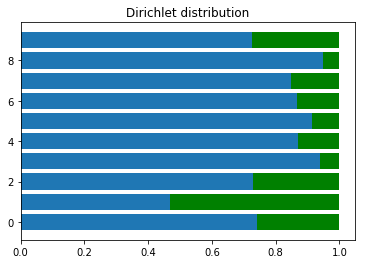

In [8]:
plot_df = plot_dirichlet_distribution_with_categories(df, size_sample=10)

In [9]:
c1, c2, c3, c4 = separate_agreed_votes_per_category(distribution=df, categories=4)

In [10]:
votes1 = np.random.random(size=(100, comments)) < c1
votes2 = np.random.random(size=(90, comments)) < c2
votes3 = np.random.random(size=(90, comments)) < c3
votes4 = np.random.random(size=(100, comments)) < c4
#votes5 = np.random.random(size=(1900, comments)) < c5
#votes6 = np.random.random(size=(2100, comments)) < c6

In [11]:
votes = np.vstack([votes1,votes2,votes3,votes4])

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2).fit_transform(votes)

In [14]:
df_pca = pd.DataFrame(pca)

In [15]:
def define_labels(category, cat):
    for c in category:
        labels.append(cat)

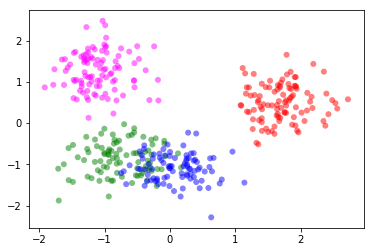

In [16]:
labels = []

define_labels(votes1,'A')
define_labels(votes2,'B')
define_labels(votes3,'C')
define_labels(votes4,'D')

label_color_dict = {'A':'red','B':'green','C':'blue','D':'magenta'}

color_votes = [label_color_dict[label] for label in labels]

plt.scatter(x=df_pca[0], y=df_pca[1], c=color_votes, edgecolor='', alpha=0.5)

In [17]:
df_ = create_column_category([votes1, votes2, votes3, votes4])

In [18]:
df_.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,category
0,1,0,0,1,1,0,1,1,1,1,...,1,1,0,0,1,1,1,1,1,1
1,0,0,1,1,1,1,1,1,1,1,...,1,0,1,0,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,0,1,1,0,1,1,1,1,0,1
3,0,0,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
4,1,1,0,1,1,1,0,1,1,1,...,1,1,1,0,1,1,0,1,1,1


In [19]:
from sklearn.decomposition import LatentDirichletAllocation

In [20]:
lda = LatentDirichletAllocation(n_components=4,
    random_state=0)
lda.fit(df_) 

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=4, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [21]:
df_[:2]

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,category
0,1,0,0,1,1,0,1,1,1,1,...,1,1,0,0,1,1,1,1,1,1
1,0,0,1,1,1,1,1,1,1,1,...,1,0,1,0,1,1,1,1,1,1


In [22]:
x = lda.transform(df_)

In [54]:
x.shape

(380, 4)

In [24]:
x

array([[0.00362696, 0.98934368, 0.0036389 , 0.00339046],
       [0.00358192, 0.98948608, 0.00358679, 0.0033452 ],
       [0.00361741, 0.9894148 , 0.00362167, 0.00334612],
       ...,
       [0.9902283 , 0.0033471 , 0.00332688, 0.00309773],
       [0.97758463, 0.00338693, 0.01589141, 0.00313703],
       [0.58939949, 0.00346424, 0.40391937, 0.00321689]])

In [60]:
x2[0]

0.9999999999999998

In [25]:
x[0]

array([0.00362696, 0.98934368, 0.0036389 , 0.00339046])

In [26]:
teste = x[:6].T

In [27]:
teste.shape

(4, 6)

In [64]:
teste[0][0]+teste[1][0]+teste[2][0]+teste[3][0]

1.0000000000000002

In [30]:
len(teste)

4

In [31]:
x

array([[0.00362696, 0.98934368, 0.0036389 , 0.00339046],
       [0.00358192, 0.98948608, 0.00358679, 0.0033452 ],
       [0.00361741, 0.9894148 , 0.00362167, 0.00334612],
       ...,
       [0.9902283 , 0.0033471 , 0.00332688, 0.00309773],
       [0.97758463, 0.00338693, 0.01589141, 0.00313703],
       [0.58939949, 0.00346424, 0.40391937, 0.00321689]])

In [32]:
T = x.T

In [33]:
T.shape

(4, 380)

In [38]:
T[:3].shape

(3, 380)

In [39]:
type(T)

numpy.ndarray

In [63]:
teste

array([[0.00362696, 0.00358192, 0.00361741, 0.00345567, 0.0036071 ,
        0.0033764 ],
       [0.98934368, 0.98948608, 0.9894148 , 0.79534858, 0.989448  ,
        0.99011198],
       [0.0036389 , 0.00358679, 0.00362167, 0.19797866, 0.00359931,
        0.00337513],
       [0.00339046, 0.0033452 , 0.00334612, 0.00321709, 0.00334559,
        0.00313649]])

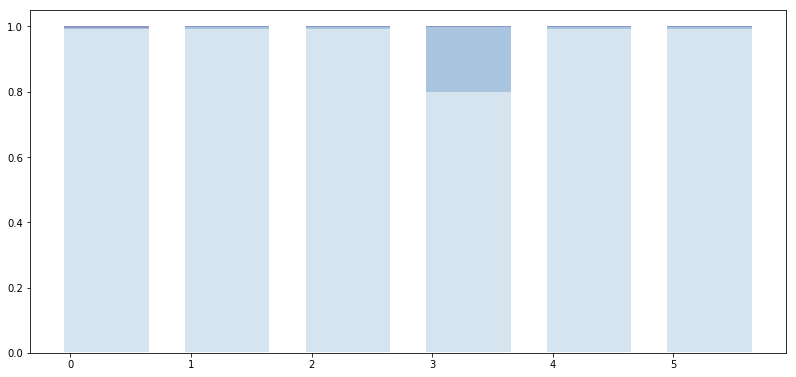

In [61]:
columns = ['%d' % x for x in range(teste.shape[1])]#('1', '2', '3', '4', '5', '6')
#rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

#values = np.arange(0, 2500, 500)
#value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, 4)) #rows
n_rows = len(teste)

index = np.arange(len(columns)) + 0.3
bar_width = 0.7

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
plt.figure(figsize=(15,7))
cell_text = []
for row in range(n_rows):
    plt.bar(index, teste[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + teste[row]
    #cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)


# plt.ylabel("Loss in ${0}'s".format(value_increment))
# plt.yticks(values * value_increment, ['%d' % val for val in values])
# plt.xticks([])
# plt.title('Loss by Disaster')

plt.show()

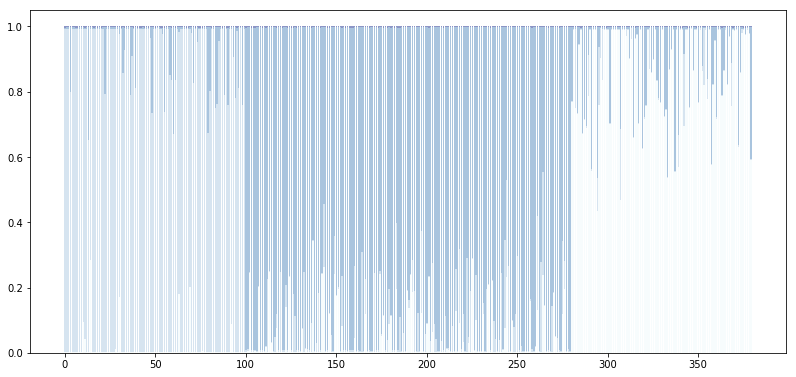

In [97]:
columns = ['%d' % x for x in range(T.shape[1])]

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, 4)) #rows #['r','g','b','magenta']
n_rows = len(teste)

index = np.arange(len(columns)) + 0.3
bar_width = 0.7

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
plt.figure(figsize=(15,7))
#cell_text = []
for row in range(n_rows):
    plt.bar(index, T[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + T[row]
    #cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
#cell_text.reverse()


# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)


plt.show()

In [89]:
plt.cm.BuPu(np.linspace(0, 0.5, 4))

array([[0.96862745, 0.98823529, 0.99215686, 1.        ],
       [0.83732411, 0.89434833, 0.9394233 , 1.        ],
       [0.6627451 , 0.76732026, 0.87058824, 1.        ],
       [0.54901961, 0.58559016, 0.77517878, 1.        ]])

In [94]:
colors[::-1]

array([[0.96862745, 0.98823529, 0.99215686, 1.        ],
       [0.83732411, 0.89434833, 0.9394233 , 1.        ],
       [0.6627451 , 0.76732026, 0.87058824, 1.        ],
       [0.54901961, 0.58559016, 0.77517878, 1.        ]])

In [86]:
df_.shape

(380, 101)

In [71]:
accs = []

In [72]:
ncols = df_.iloc[:, :-1].shape[1]

In [73]:
#from sklearn import datasets
from sklearn import metrics
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [74]:
for i in range(1, ncols):
    print('I', i)
    X_train, X_test, y_train, y_test = train_test_split(df_.iloc[:,:i], df_['category'], test_size = 0.2)#, random_state=17)
    bern = BernoulliNB()
    bern.fit(X_train, y_train)
    y_exp = y_test
    y_pred = bern.predict(X_test)
    acc =  accuracy_score(y_exp, y_pred)
    print("acc: ", acc)
    accs.append({'acc': acc, 'qtd': i})

I 1
acc:  0.34210526315789475
I 2
acc:  0.27631578947368424
I 3
acc:  0.2894736842105263
I 4
acc:  0.35526315789473684
I 5
acc:  0.4868421052631579
I 6
acc:  0.42105263157894735
I 7
acc:  0.6842105263157895
I 8
acc:  0.631578947368421
I 9
acc:  0.5921052631578947
I 10
acc:  0.7631578947368421
I 11
acc:  0.6842105263157895
I 12
acc:  0.6578947368421053
I 13
acc:  0.7894736842105263
I 14
acc:  0.7368421052631579
I 15
acc:  0.8026315789473685
I 16
acc:  0.7631578947368421
I 17
acc:  0.7894736842105263
I 18
acc:  0.7631578947368421
I 19
acc:  0.8289473684210527
I 20
acc:  0.8026315789473685
I 21
acc:  0.8421052631578947
I 22
acc:  0.8157894736842105
I 23
acc:  0.7894736842105263
I 24
acc:  0.7236842105263158
I 25
acc:  0.8026315789473685
I 26
acc:  0.7894736842105263
I 27
acc:  0.868421052631579
I 28
acc:  0.8289473684210527
I 29
acc:  0.9342105263157895
I 30
acc:  0.9078947368421053
I 31
acc:  0.8289473684210527
I 32
acc:  0.8947368421052632
I 33
acc:  0.868421052631579
I 34
acc:  0.88157

In [75]:
df_accs = pd.DataFrame.from_dict(accs)


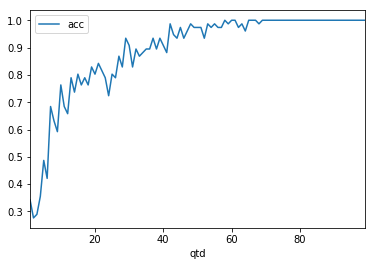

In [76]:
df_accs.plot.line(x='qtd', y='acc')

In [77]:
print("acc: ", accuracy_score(y_exp, y_pred))
print(metrics.classification_report(y_exp, y_pred))
print(metrics.confusion_matrix(y_exp, y_pred))

acc:  1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        20

   micro avg       1.00      1.00      1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76

[[16  0  0  0]
 [ 0 22  0  0]
 [ 0  0 18  0]
 [ 0  0  0 20]]


In [ ]:
# https://appliedmachinelearning.blog/2017/05/23/understanding-naive-bayes-classifier-from-scratch-python-code/